# Actividad autoevaluable

In [1]:
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Ejemplo de un objeto de test

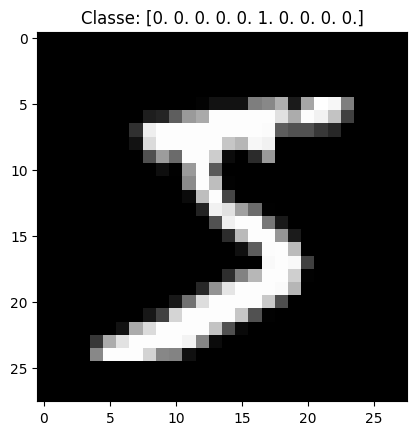

In [3]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Classe: {y_train[0]}")
plt.show()

In [4]:
class LeNet:
    @staticmethod
    def build(input_shape):
        model = Sequential()

        model.add(Conv2D(filters=20, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Conv2D(filters=20, kernel_size=3, padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Conv2D(filters=30, kernel_size=3, padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))

        # model.add(Conv2D(filters=30, kernel_size=3, padding='same', activation='relu'))
        # model.add(Conv2D(filters=30, kernel_size=3, padding='same', activation='relu'))
        # model.add(MaxPooling2D(pool_size=(2,2)))

        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
        model.add(Dense(10, activation='softmax'))

        return model



In [5]:
x_train[0].shape

(28, 28)

In [6]:
model = LeNet.build((28,28,1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 20)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 20)        3620      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 20)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 30)          5430      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 30)          0

In [7]:
model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 13s 17ms/step - loss: 0.5304 - accuracy: 0.9172 - val_loss: 0.0872 - val_accuracy: 0.9740
Epoch 2/5
750/750 [==============================] - 13s 18ms/step - loss: 0.0787 - accuracy: 0.9757 - val_loss: 0.0893 - val_accuracy: 0.9736
Epoch 3/5
750/750 [==============================] - 12s 16ms/step - loss: 0.0553 - accuracy: 0.9820 - val_loss: 0.0721 - val_accuracy: 0.9799
Epoch 4/5
750/750 [==============================] - 12s 16ms/step - loss: 0.0472 - accuracy: 0.9851 - val_loss: 0.0605 - val_accuracy: 0.9818
Epoch 5/5
750/750 [==============================] - 13s 18ms/step - loss: 0.0401 - accuracy: 0.9875 - val_loss: 0.0567 - val_accuracy: 0.9837


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


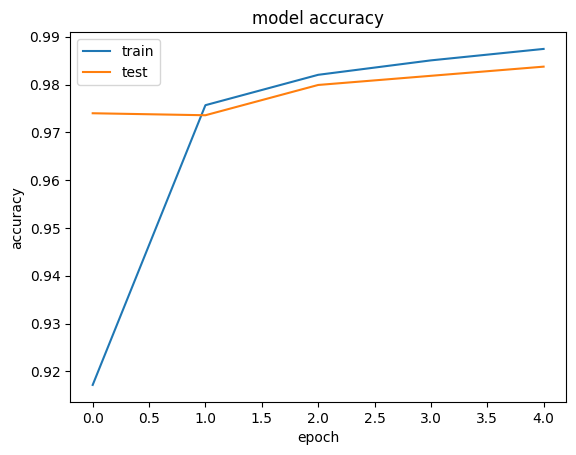

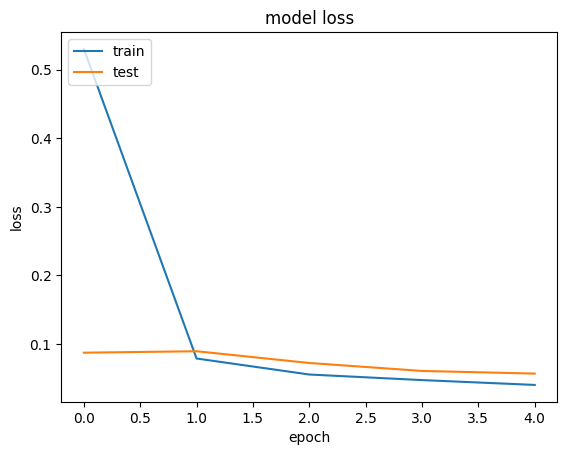

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
score = model.evaluate(x_test, y_test, verbose=1)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0538 - accuracy: 0.9846

Test score: 0.05378967151045799
Test accuracy: 0.9846000075340271
